# OCSVM - One-Class Support Vector Machine
### One-Class Support Vector Machine (SVM) is an unsupervised model for anomaly or outlier detection. Unlike the regular supervised SVM, the one-class SVM does not have target labels for the model training process. Instead, it learns the boundary for the normal data points and identifies the data outside the border to be anomalies. ### 
source: https://medium.com/grabngoinfo/one-class-svm-for-anomaly-detection-6c97fdd6d8af

### Arguments that work with OCSVM algorithm
1. kernel
2. degree
3. gamma
4. coef0
5. tol
6. nu
7. shrinking
8. cache_size
9. verbose
10. max_iter
11. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)

get2D                    ...took   110.287681 seconds


In [3]:
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

image downsampling       ...took     4.188237 seconds
image downsampling       ...took     5.609908 seconds
image downsampling       ...took     7.108417 seconds
image downsampling       ...took    10.207332 seconds
image downsampling       ...took    13.422141 seconds
image downsampling       ...took    16.629481 seconds
image downsampling       ...took    18.059474 seconds
image downsampling       ...took    21.378757 seconds
image downsampling       ...took    22.930160 seconds
image downsampling       ...took    24.549988 seconds
image downsampling       ...took    27.760368 seconds
image downsampling       ...took    29.348583 seconds
image downsampling       ...took    32.364878 seconds
image downsampling       ...took    33.854453 seconds
image downsampling       ...took    37.636656 seconds
image downsampling       ...took    39.838604 seconds
image downsampling       ...took    49.838289 seconds
image downsampling       ...took    52.462875 seconds
image downsampling       ...

(64, 64)


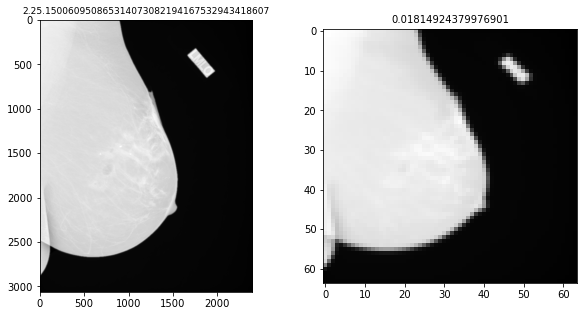

(64, 64)


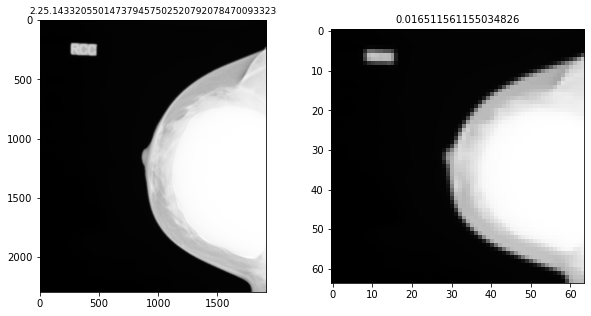

(64, 64)


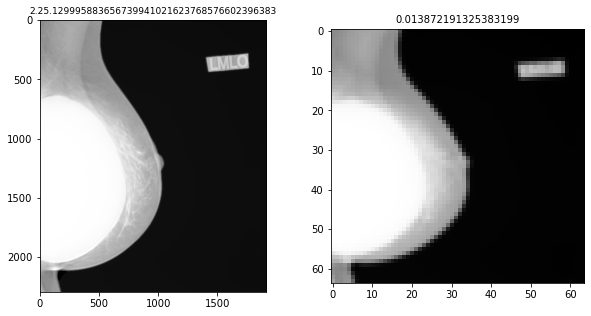

(64, 64)


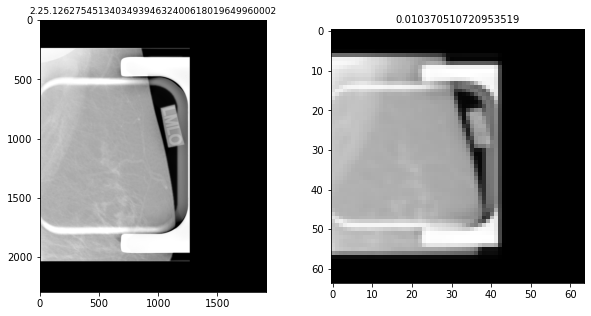

(64, 64)


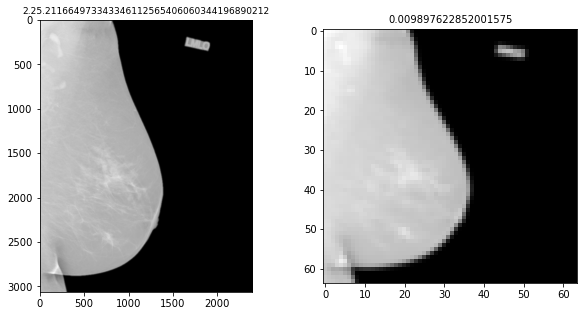

(64, 64)


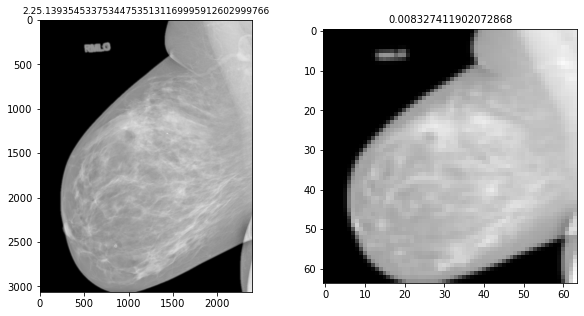

(64, 64)


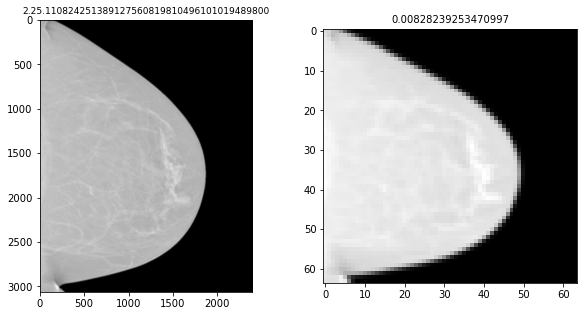

(64, 64)


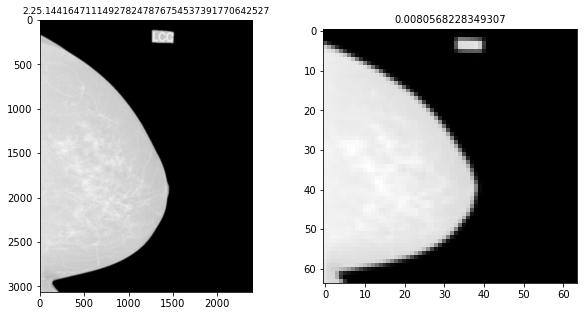

(64, 64)


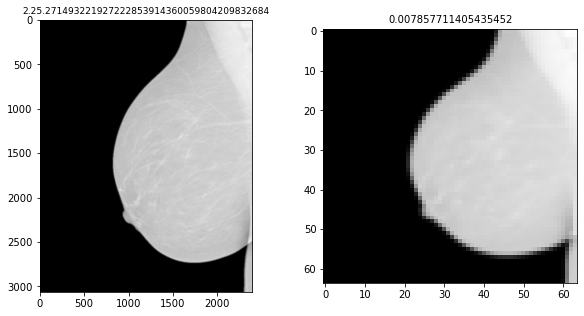

(64, 64)


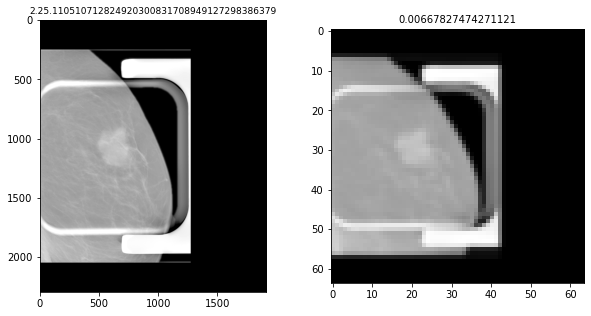

(64, 64)


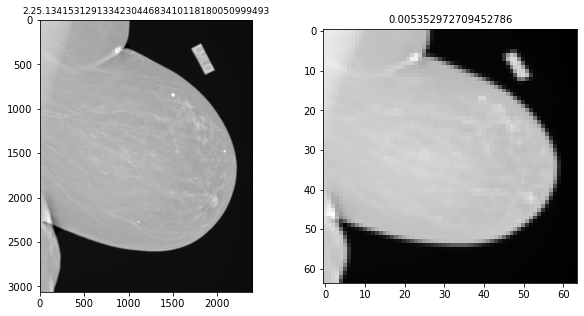

(64, 64)


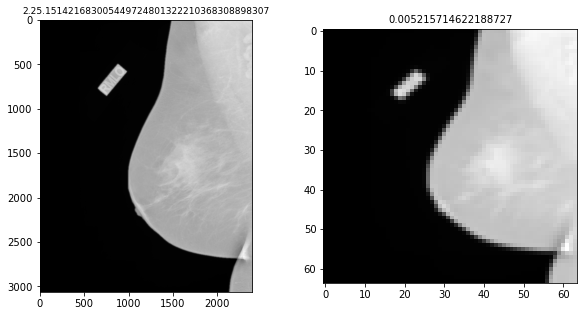

(64, 64)


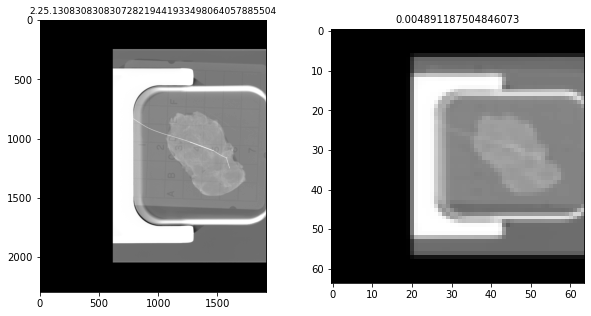

(64, 64)


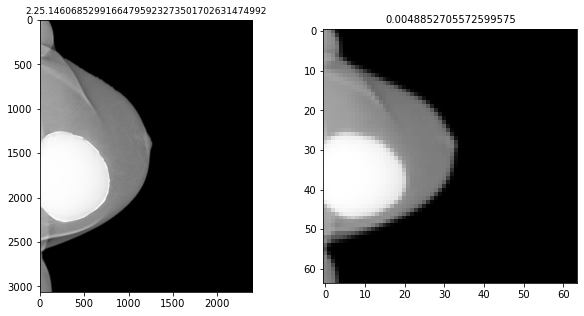

(64, 64)


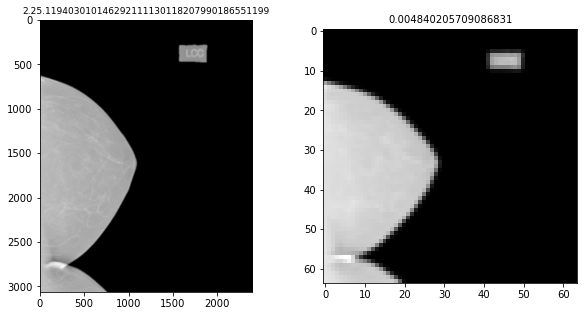

(64, 64)


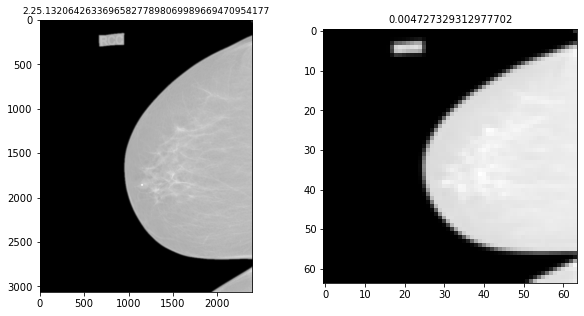

(64, 64)


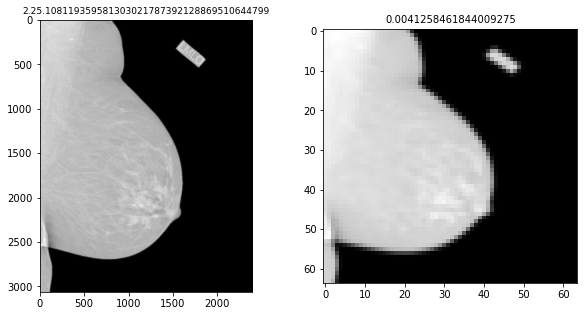

(64, 64)


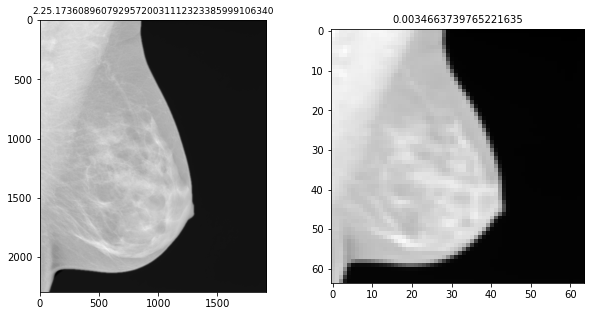

(64, 64)


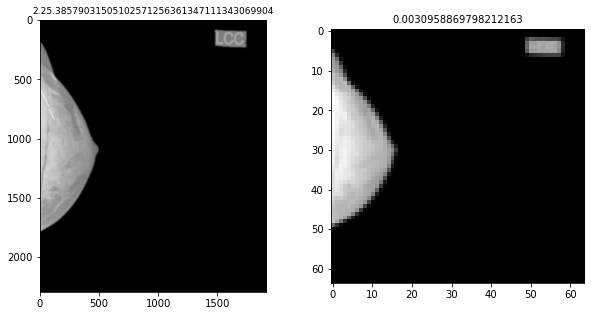

(64, 64)


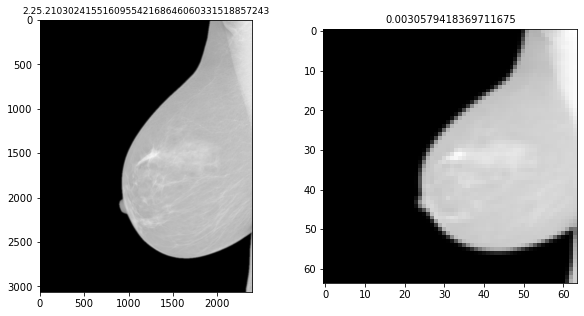

(64, 64)


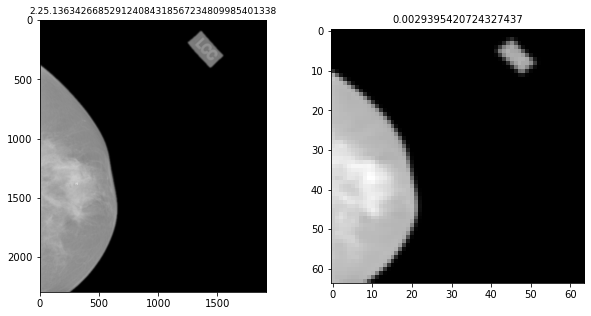

(64, 64)


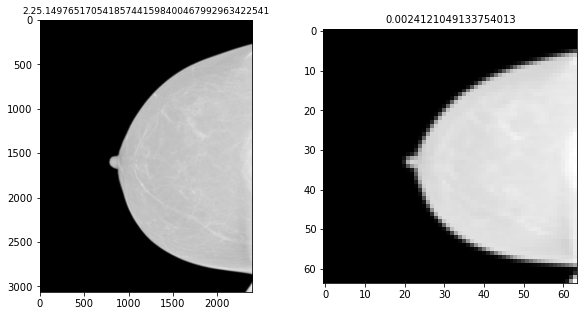

(64, 64)


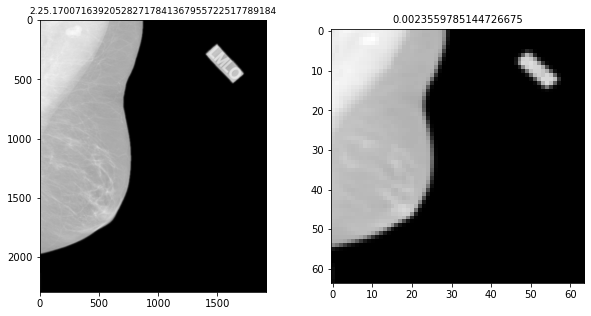

(64, 64)


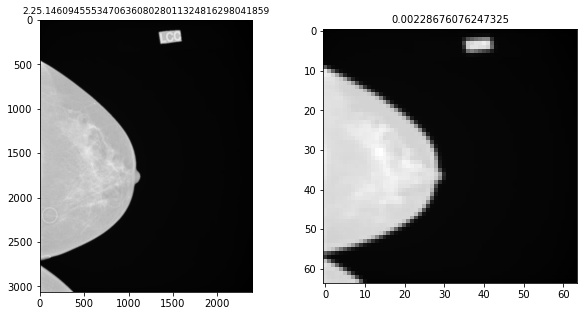

(64, 64)


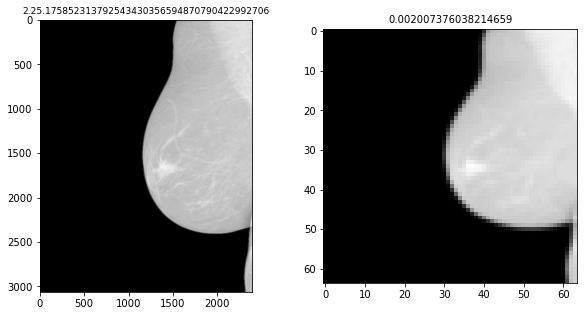

(64, 64)


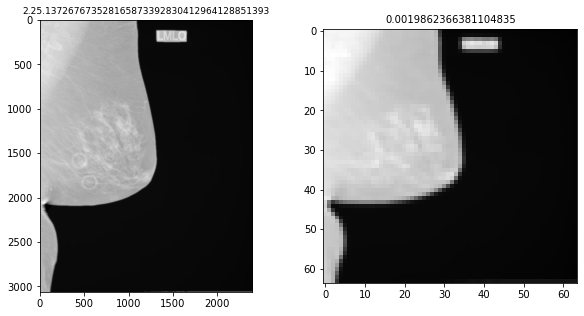

(64, 64)


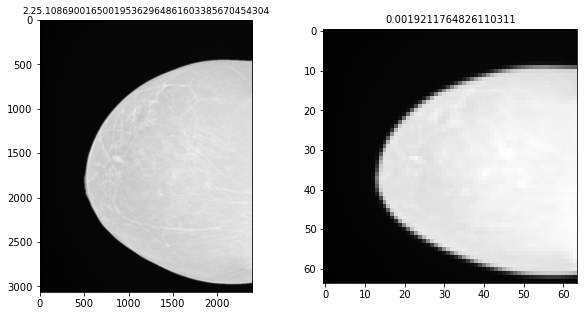

(64, 64)


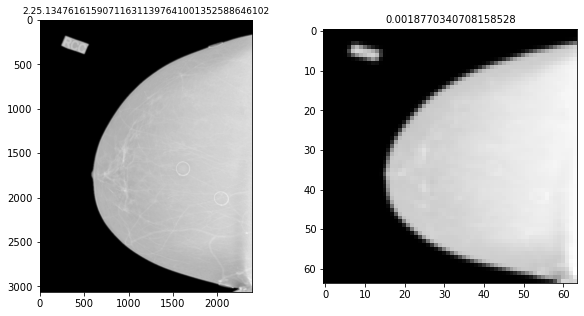

(64, 64)


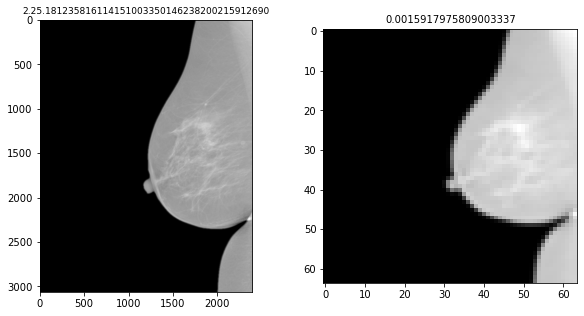

(64, 64)


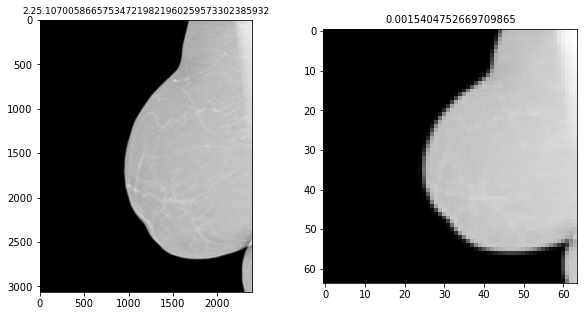

(64, 64)


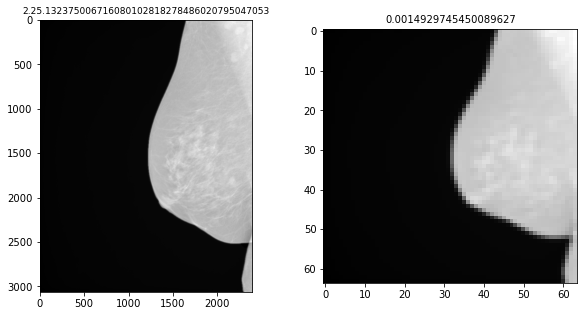

(64, 64)


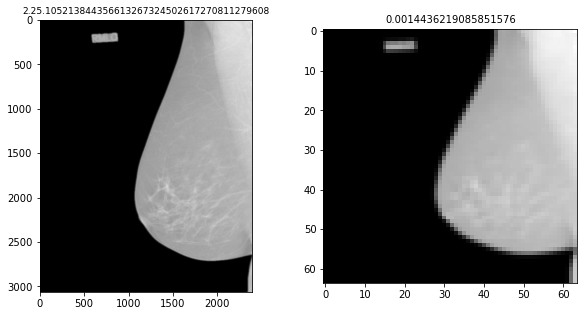

(64, 64)


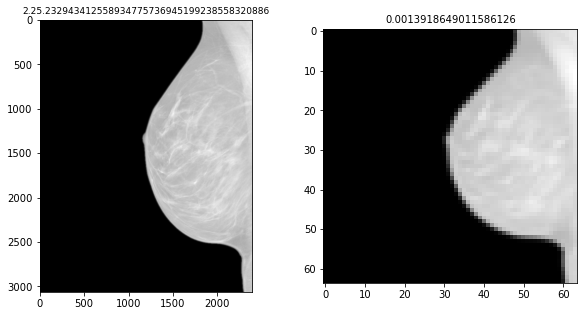

(64, 64)


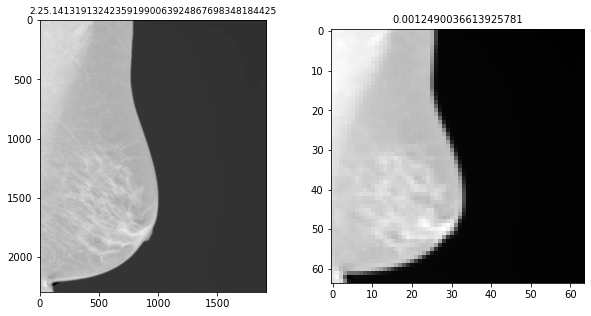

(64, 64)


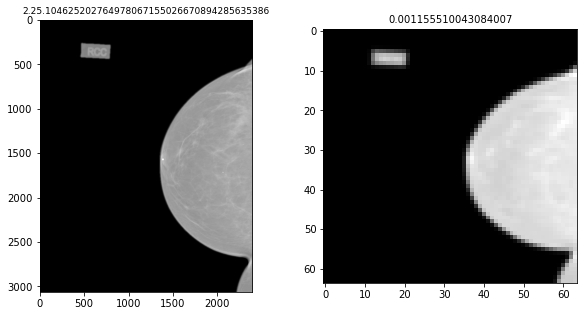

(64, 64)


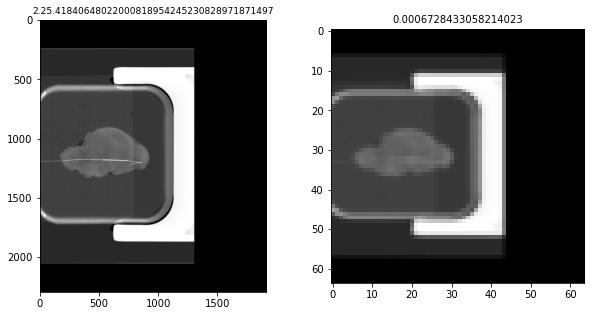

(64, 64)


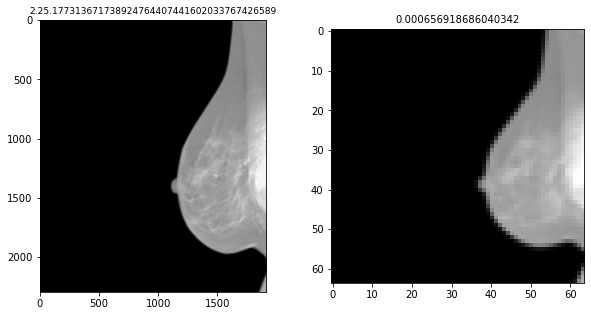

(64, 64)


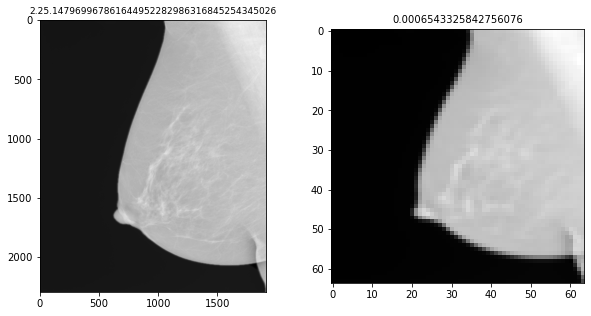

(64, 64)


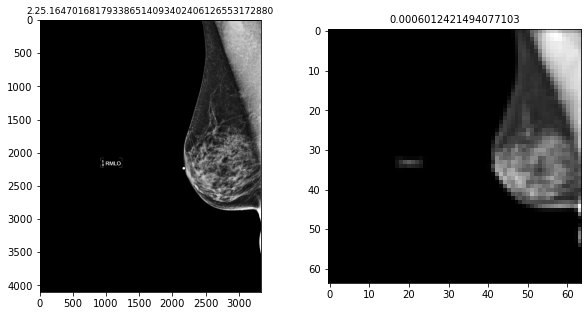

(64, 64)


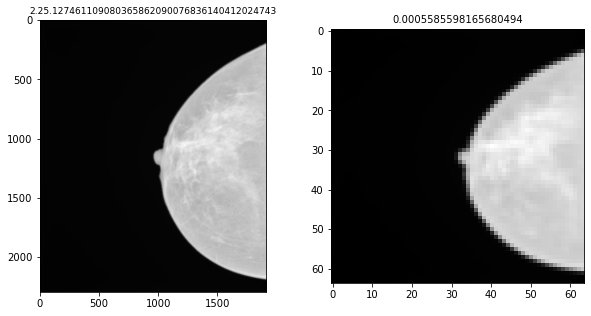

(64, 64)


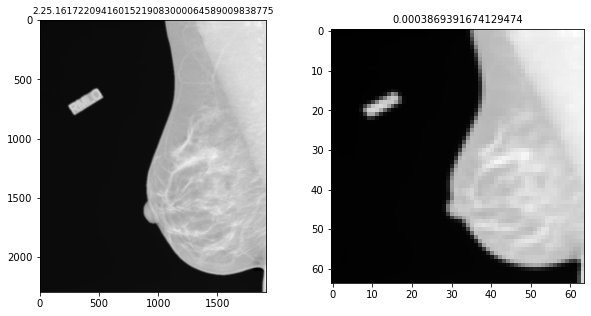

(64, 64)


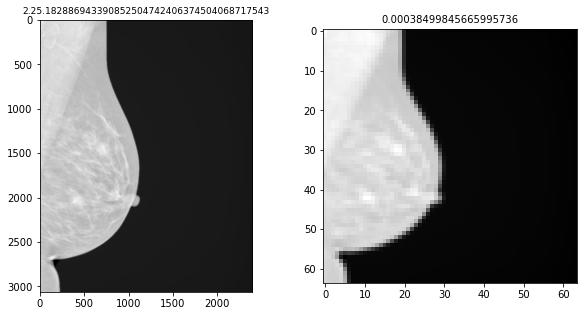

(64, 64)


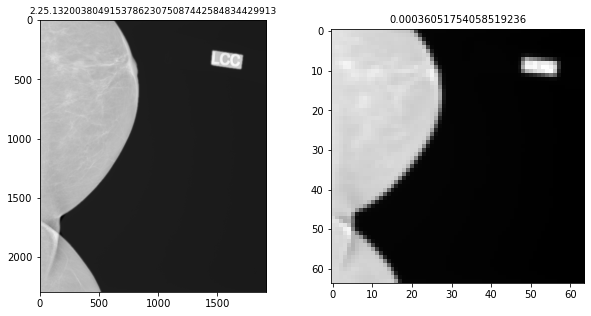

(64, 64)


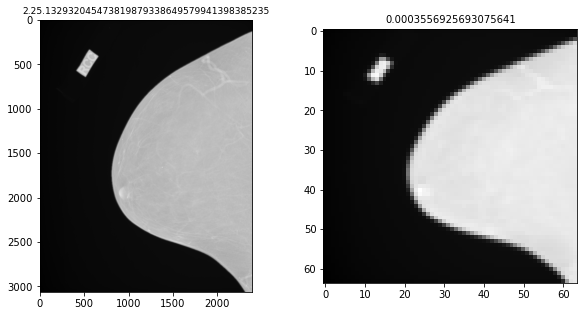

(64, 64)


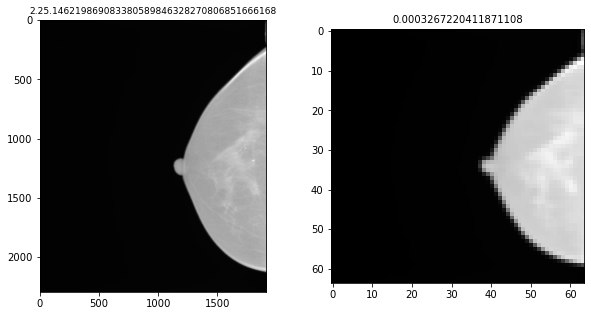

(64, 64)


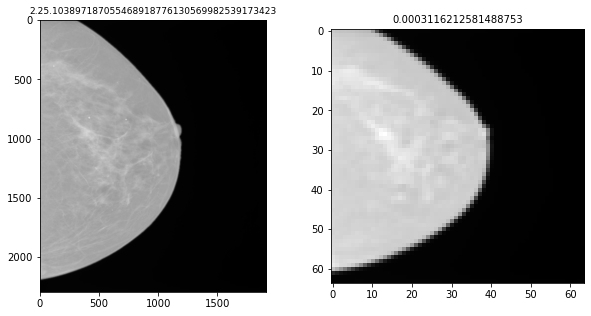

(64, 64)


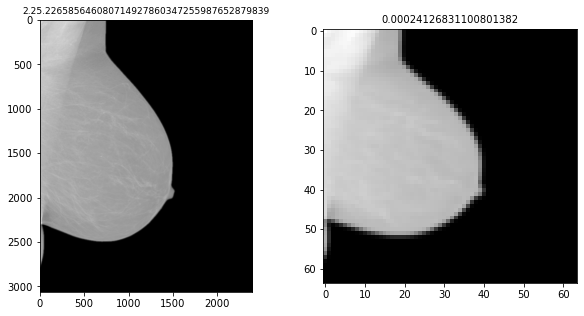

(64, 64)


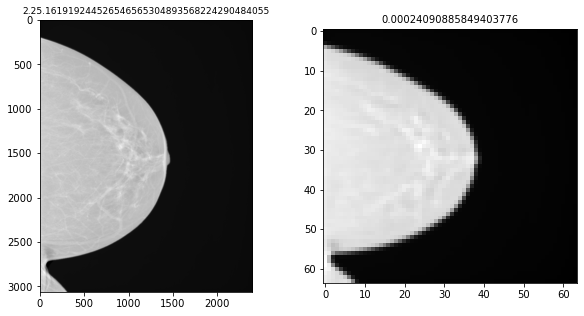

(64, 64)


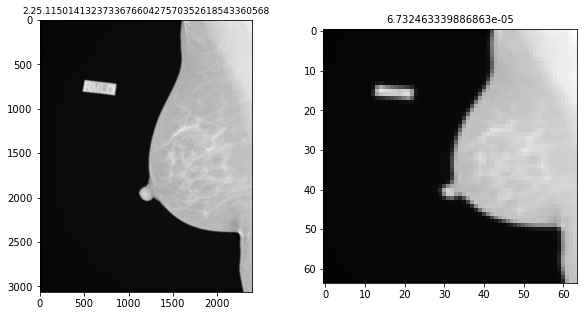

(64, 64)


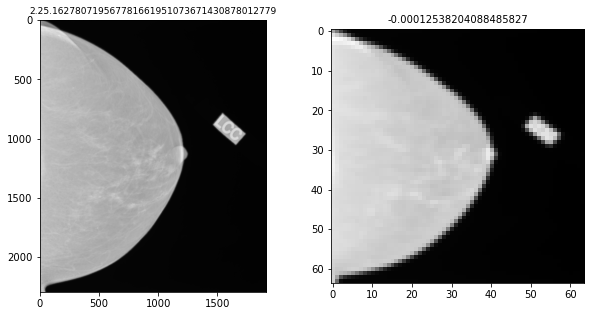

(64, 64)


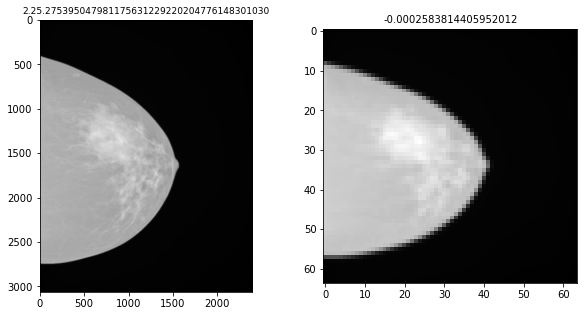

(64, 64)


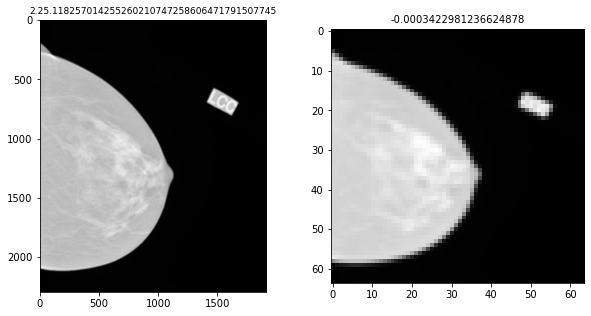

(64, 64)


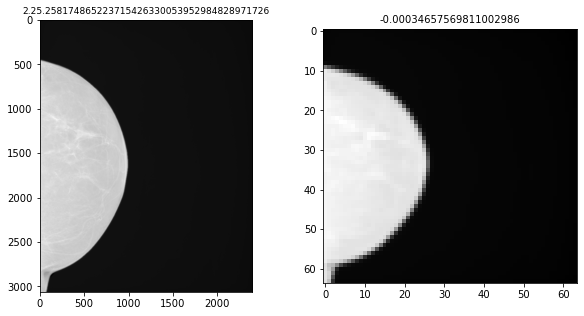

(64, 64)


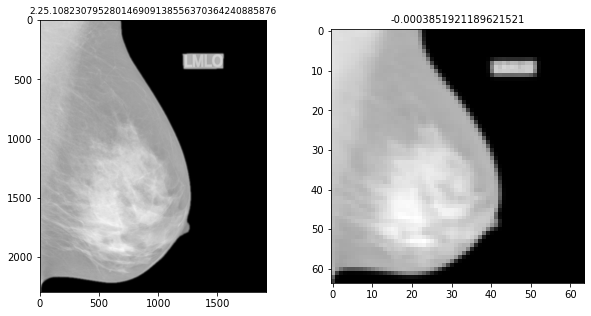

(64, 64)


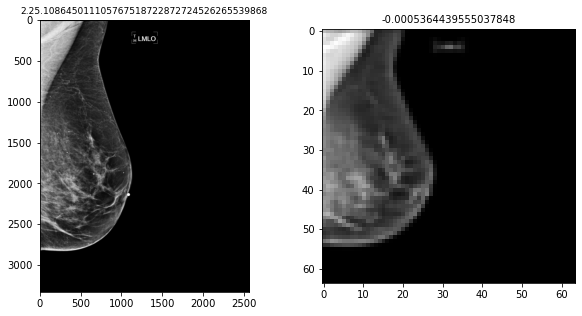

(64, 64)


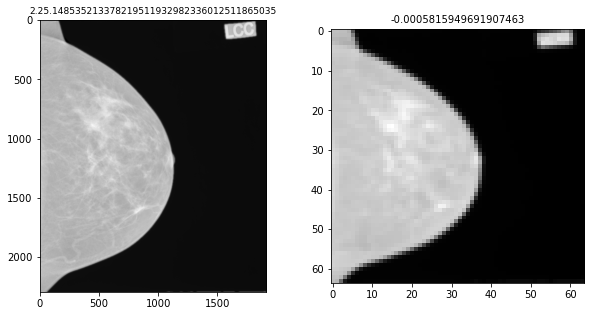

(64, 64)


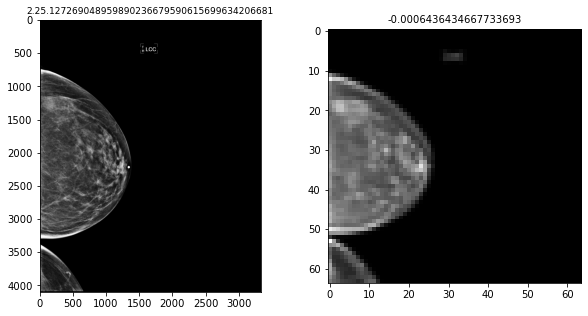

(64, 64)


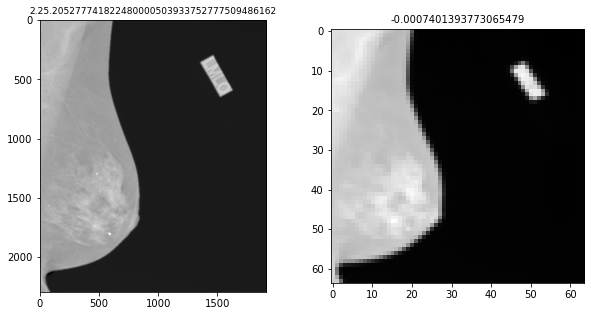

(64, 64)


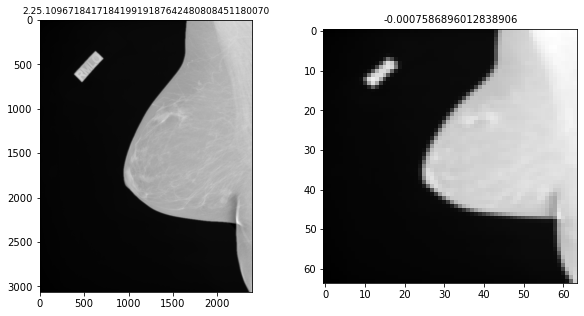

(64, 64)


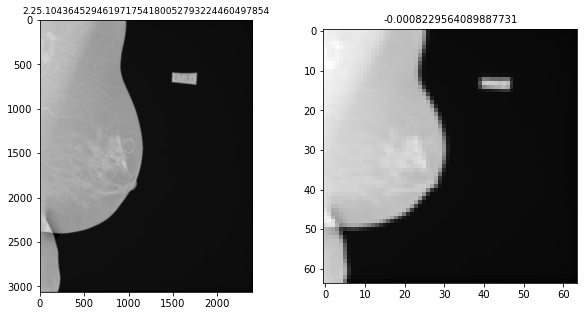

(64, 64)


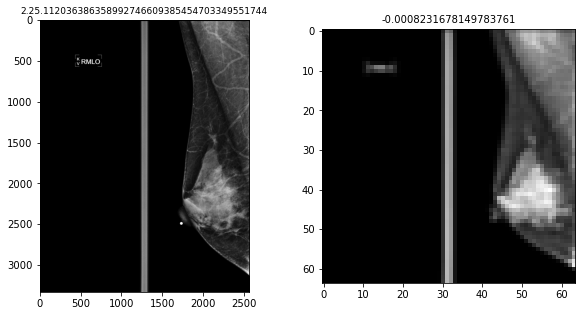

(64, 64)


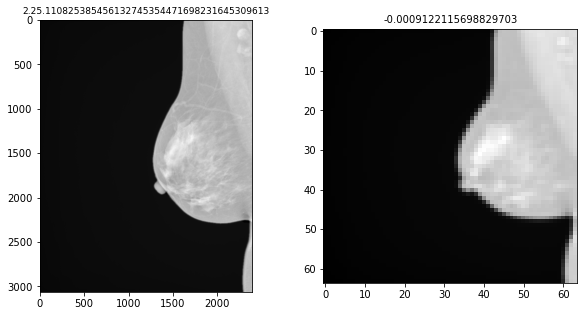

(64, 64)


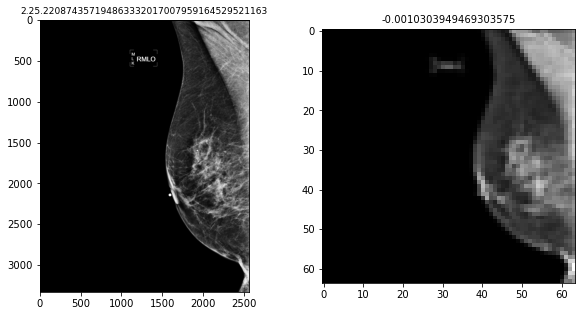

(64, 64)


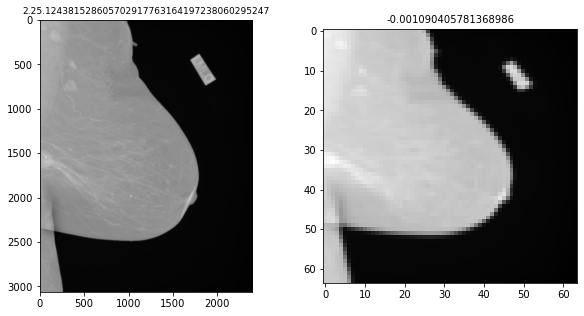

(64, 64)


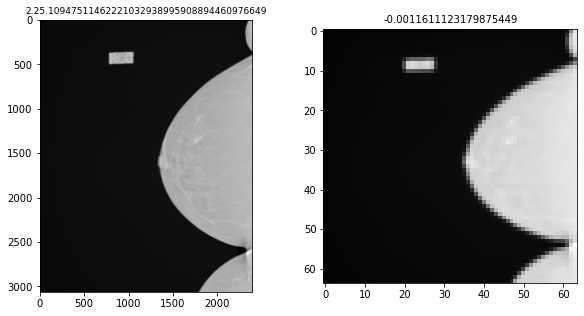

(64, 64)


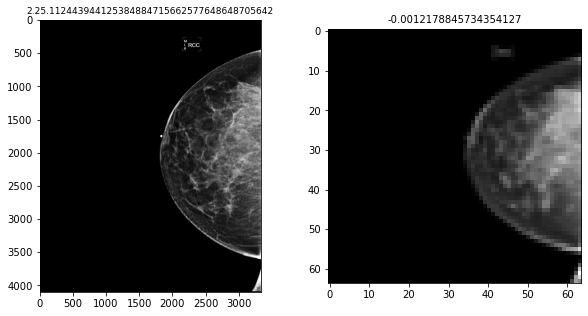

(64, 64)


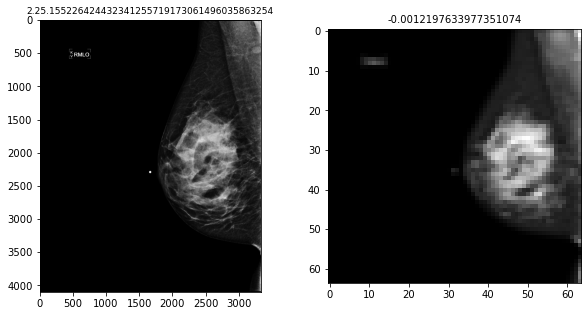

(64, 64)


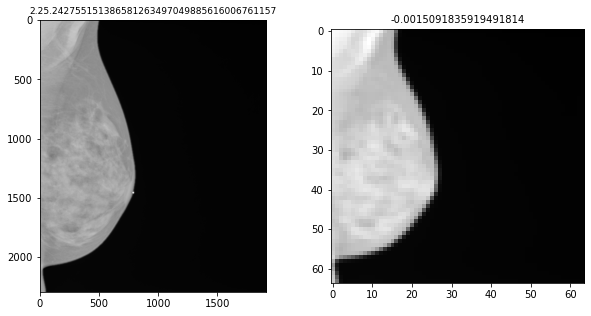

(64, 64)


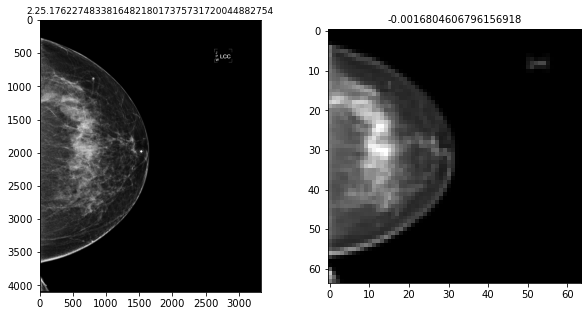

(64, 64)


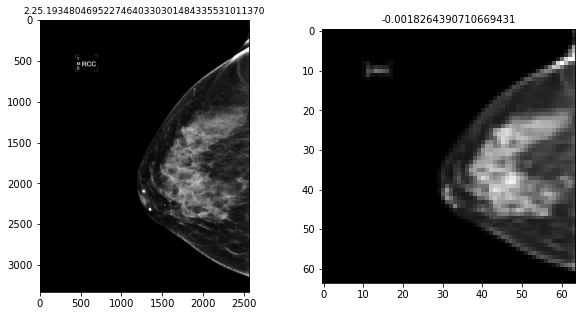

(64, 64)


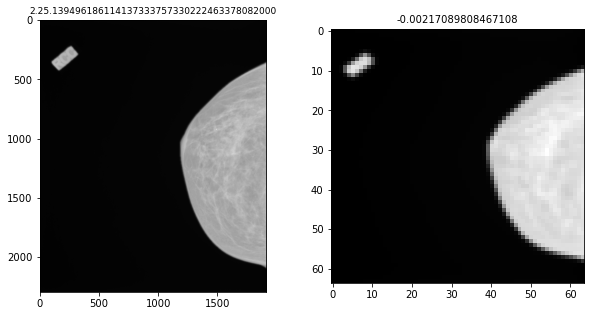

(64, 64)


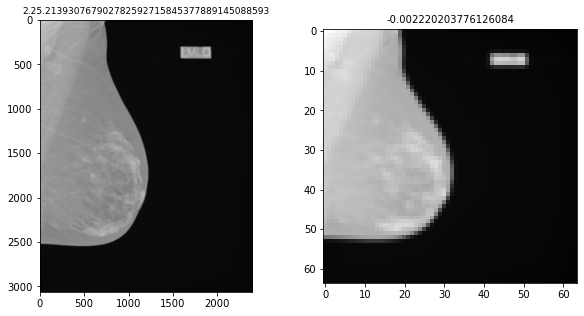

(64, 64)


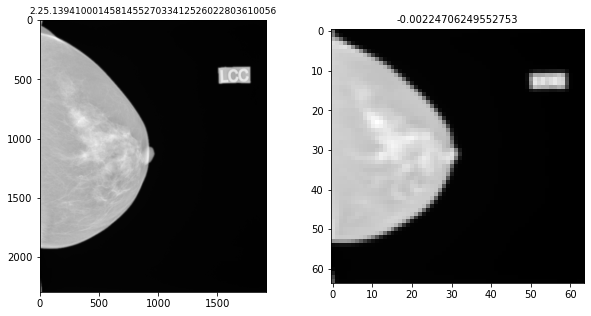

(64, 64)


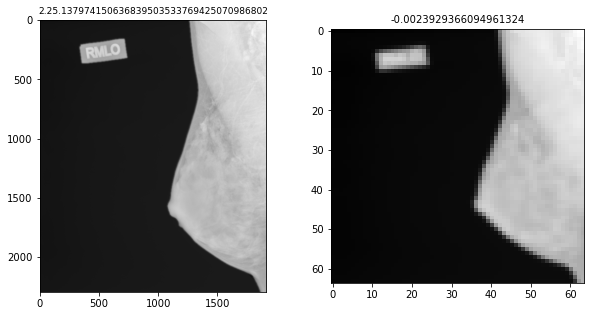

(64, 64)


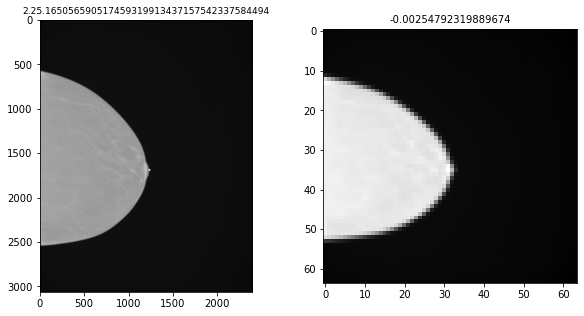

(64, 64)


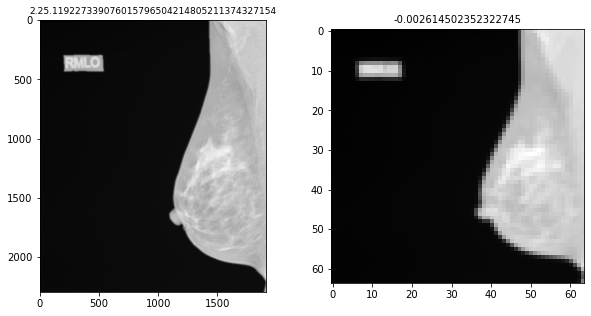

(64, 64)


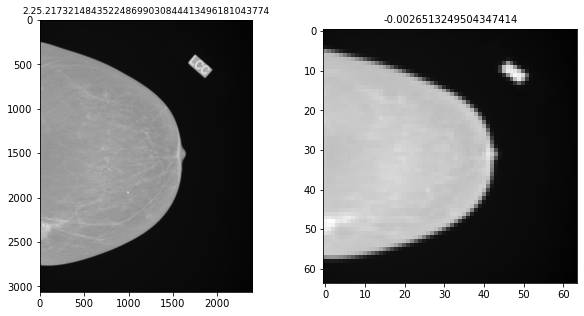

(64, 64)


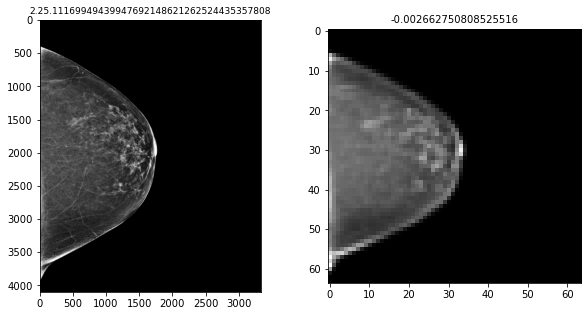

(64, 64)


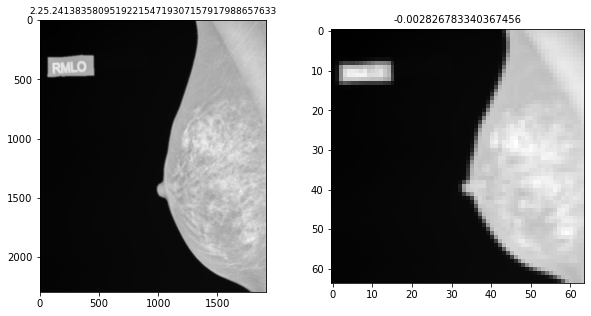

(64, 64)


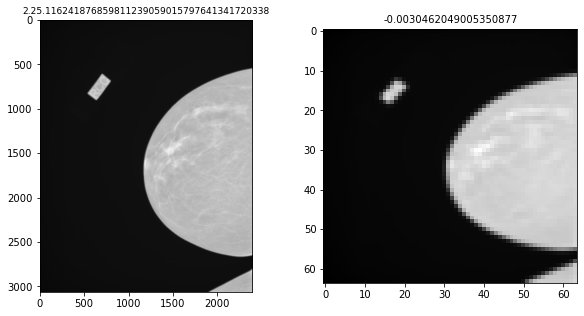

(64, 64)


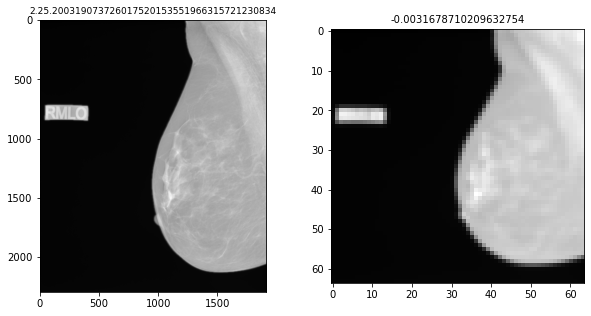

(64, 64)


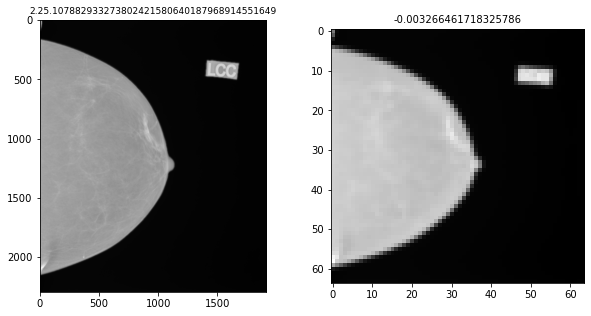

(64, 64)


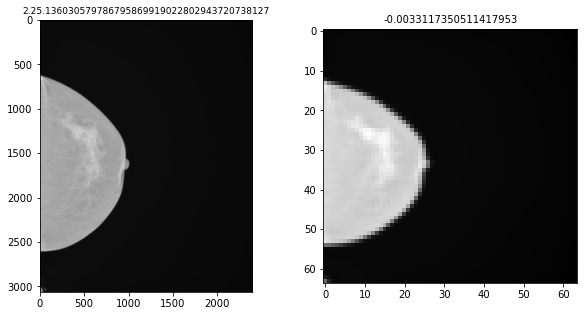

(64, 64)


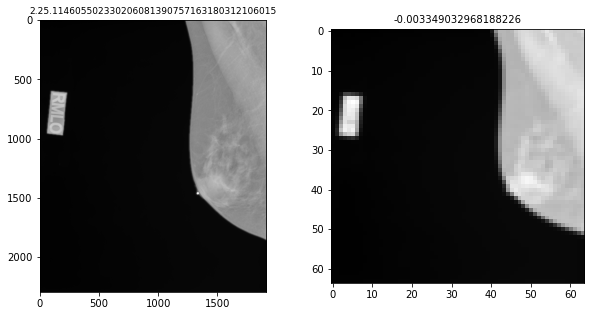

(64, 64)


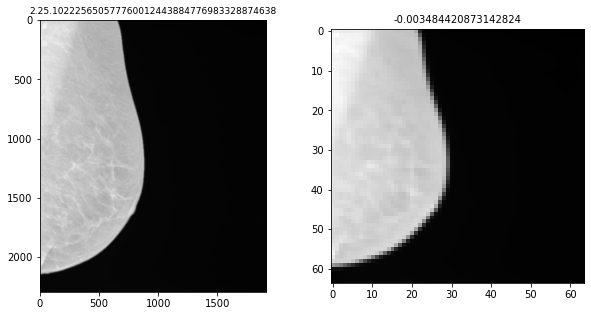

(64, 64)


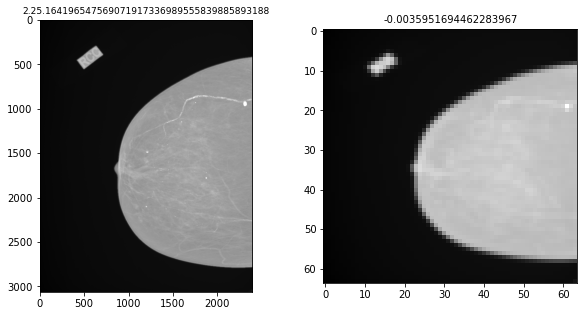

(64, 64)


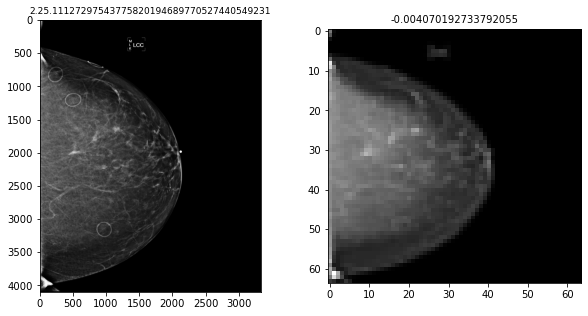

(64, 64)


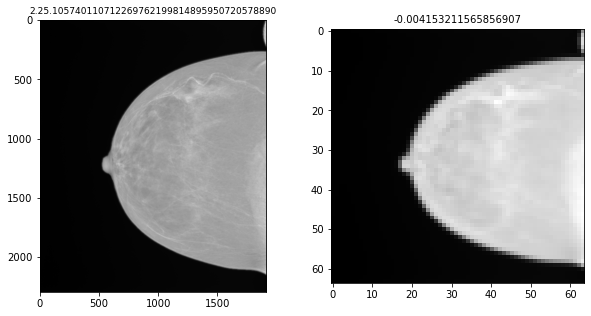

(64, 64)


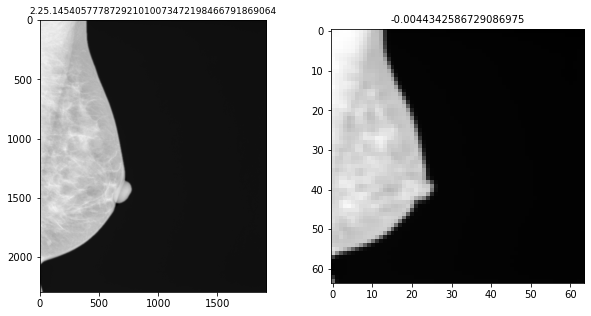

(64, 64)


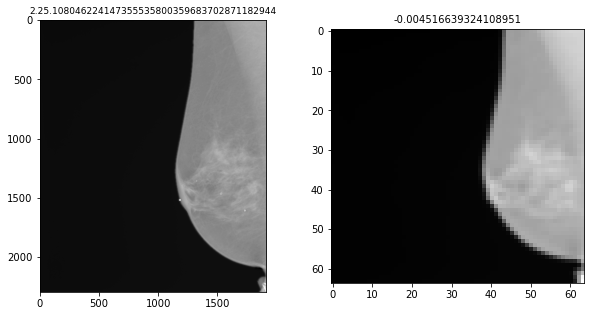

(64, 64)


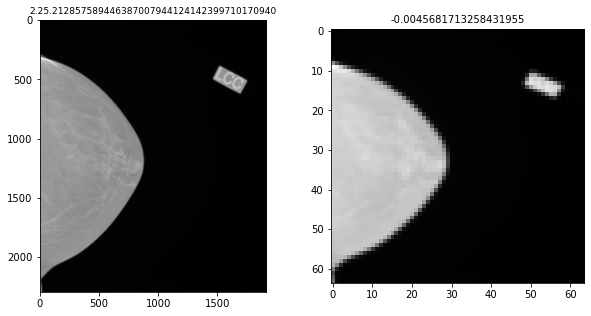

(64, 64)


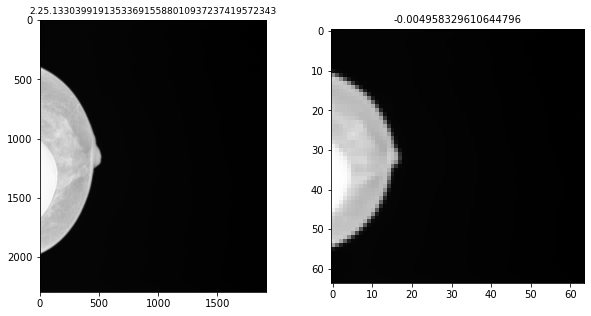

(64, 64)


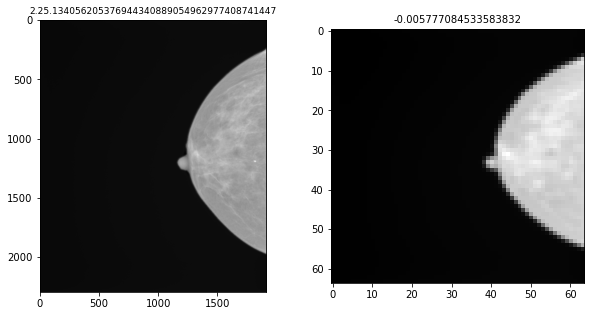

(64, 64)


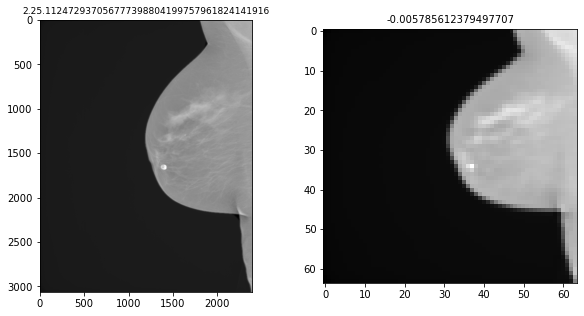

(64, 64)


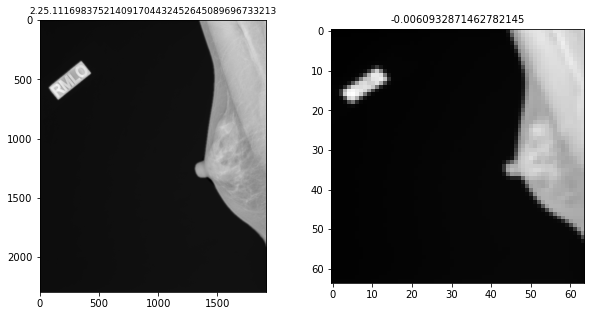

(64, 64)


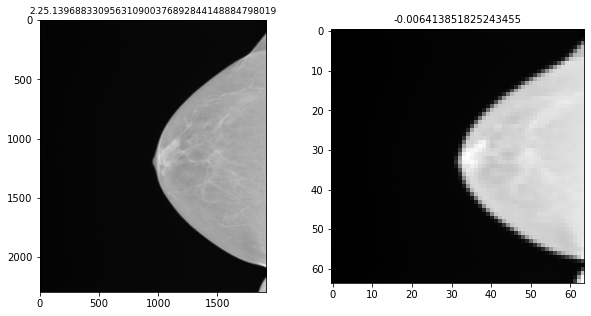

(64, 64)


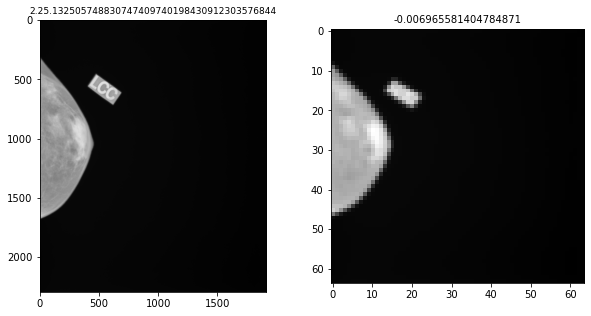

(64, 64)


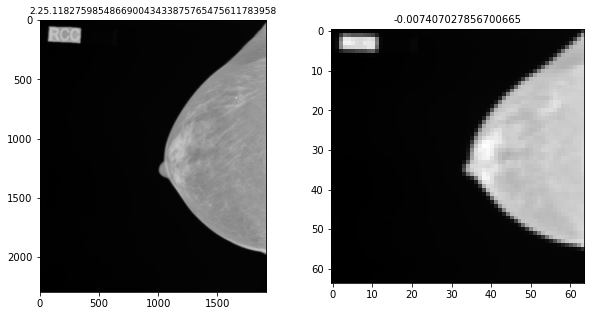

(64, 64)


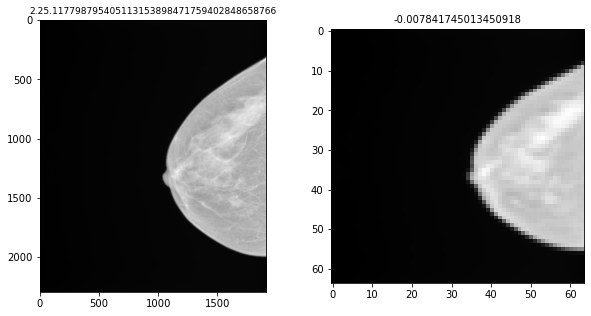

(64, 64)


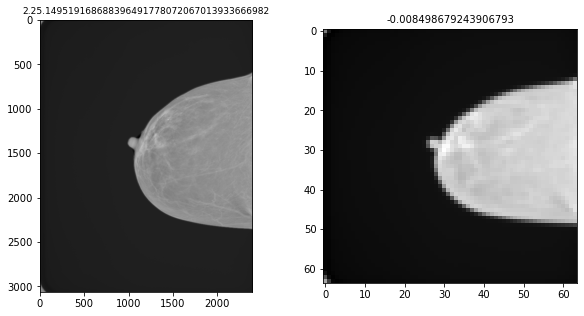

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='OCSVM')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])